<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/Data_assimilation_Eirik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

Two forecasts: The second forecast is initialized 3 hours laters and has thus utilized forecast_1 as model background.

# Fill in the dates and hours for the exercise

In [3]:
year = '2018'; day = '24'; month = '10'
hour_1 = '00'; hour_2 = '06'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_full_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_full_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

In [ ]:
forecast_1.air_temperature_ml

# Find a specific point and plot forecast

Note AROME Arctic is on an irregular grid

In [4]:
import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [5]:
[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,60.47,11.40) # Hamar

In [6]:
mlevel=64
tml_point_forecast_1 = forecast_1.air_temperature_ml[:,64,ix,jx]
tml_point_forecast_2 = forecast_2.air_temperature_ml[:,64,ix,jx]

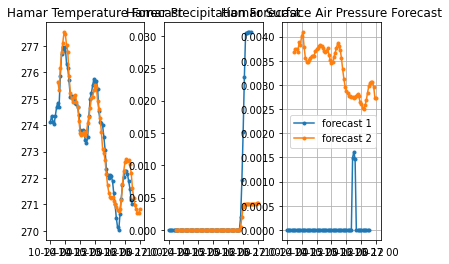

In [15]:
#Trying a more compact format

from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,3, sharex=True)
ax[0].plot(forecast_1.time, tml_point_forecast_1, '.-',label="forecast 1")
ax[0].plot(forecast_2.time, tml_point_forecast_2, '.-',label="forecast 2")
ax[0].set_title("Hamar Temperature Forecast")
plt.grid()

ax[1].plot(forecast_1.time, forecast_1.precipitation_amount_acc[:,0,ix,jx], '.-',label="forecast 1")
ax[1].plot(forecast_2.time, forecast_2.precipitation_amount_acc[:,0,ix,jx], '.-',label="forecast 2")
ax[1].set_title("Hamar Precipitation Forecast")
plt.grid()

ax[2].plot(forecast_1.time, forecast_1.cloud_area_fraction_ml[:,64,ix,jx], '.-',label="forecast 1")
ax[2].plot(forecast_2.time, forecast_2.specific_humidity_ml[:,64,ix,jx], '.-',label="forecast 2")
ax[2].set_title("Hamar Surface Air Pressure Forecast")
plt.grid(); 
plt.legend(); 

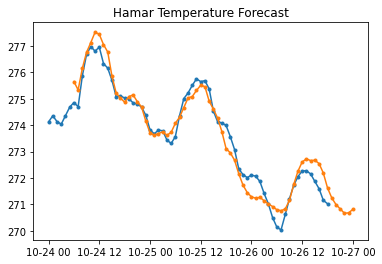

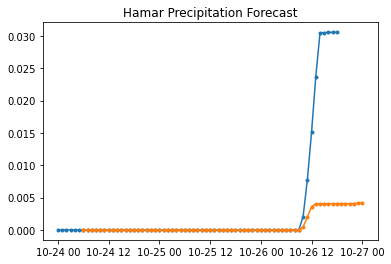

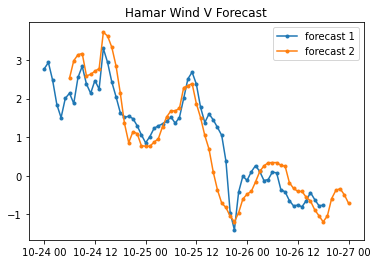

In [35]:
#Same as above, just differnt format 

plt.plot(forecast_1.time, tml_point_forecast_1, '.-')
plt.plot(forecast_2.time, tml_point_forecast_2, '.-')
plt.title("Hamar Temperature Forecast")
plt.show()

plt.plot(forecast_1.time, forecast_1.precipitation_amount_acc[:,0,ix,jx], '.-')
plt.plot(forecast_2.time, forecast_2.precipitation_amount_acc[:,0,ix,jx], '.-')
plt.title("Hamar Precipitation Forecast")
plt.show()
#wind1 = ((forecast_1.y_wind_10m[:,0,ix,jx])^2+(forecast_1.x_wind_10m[:,0,ix,jx])^2)^(1/2)
#wind2 = ((forecast_2.y_wind_10m[:,0,ix,jx])^2+(forecast_2.x_wind_10m[:,0,ix,jx])^2)^(1/2)
plt.plot(forecast_1.time, forecast_1.x_wind_10m[:,0,ix,jx], '.-',label="forecast 1")
plt.plot(forecast_2.time, forecast_2.x_wind_10m[:,0,ix,jx], '.-', label="forecast 2")
plt.title("Hamar Wind V Forecast"), plt.legend()
plt.show()

In [ ]:
forecast_1

# Plot forecast on a map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The following kwargs were not used by contour: 'extemd'


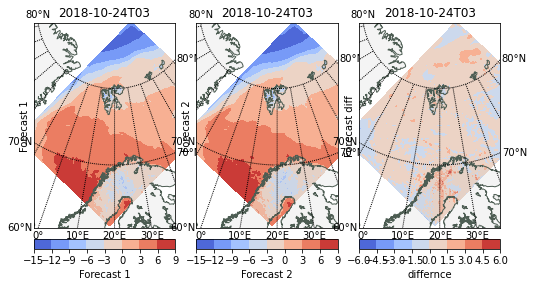

In [41]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep_1=3
timestep_2=0

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
gs = gridspec.GridSpec(1, 3)

m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 60.0, urcrnrlat=82.0, llcrnrlon=-1.0, urcrnrlon=100.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.air_temperature_ml[timestep_1,mlevel,:,:]-273),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
plt.ylabel("Forecast 1")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 1') 

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_2.air_temperature_ml[timestep_2,mlevel,:,:]-273),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
plt.ylabel("Forecast 2")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 2') 

ax = plt.subplot(gs[2],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.air_temperature_ml[timestep_1,mlevel,:,:])- np.array(forecast_2.air_temperature_ml[timestep_2,mlevel,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
plt.ylabel("Forecast diff")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('differnce')  

## Analyse the impact of the data assimilation - Surface Model 

In [48]:
year =  '2020'; day  =  '15'; month = '09'; hour_1  ='00'; hour_2  ='06'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_sfx_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)
url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_sfx_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

Point Forecast Hamar

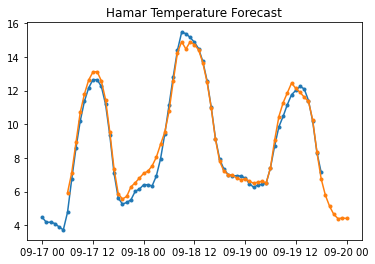

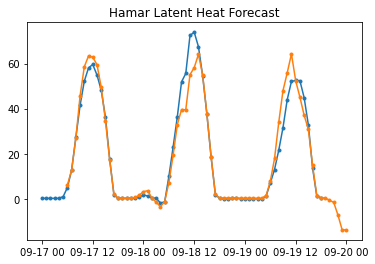

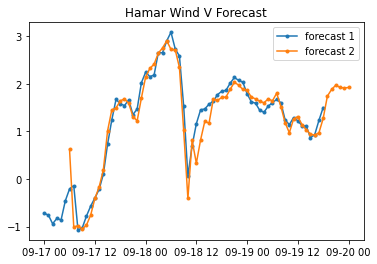

In [50]:
plt.plot(forecast_1.time, forecast_1.TS[:,ix,jx]-273, '.-')
plt.plot(forecast_2.time, forecast_2.TS[:,ix,jx]-273, '.-')
plt.title("Hamar Temperature Forecast")
plt.show()

plt.plot(forecast_1.time, forecast_1.LE[:,ix,jx], '.-')
plt.plot(forecast_2.time, forecast_2.LE[:,ix,jx], '.-')
plt.title("Hamar Latent Heat Forecast")
plt.show()

plt.plot(forecast_1.time, forecast_1.MER10M[:,ix,jx], '.-',label="forecast 1")
plt.plot(forecast_2.time, forecast_2.MER10M[:,ix,jx], '.-', label="forecast 2")
plt.title("Hamar Wind V Forecast"), plt.legend()
plt.show()

In [ ]:
forecast_1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'extemd'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: The following kwargs were not used by contour: 'extemd'


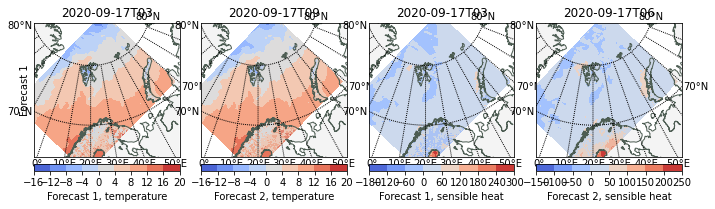

In [56]:
timestep_1=3
#timestep_2=0

fig = plt.figure(figsize=(10,10)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
gs = gridspec.GridSpec(1, 4)

m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 63.0, urcrnrlat=75.0, llcrnrlon=-1.0, urcrnrlon=100.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.TS[timestep_1,:,:]-273),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
plt.ylabel("Forecast 1")
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 1, temperature')  

ax = plt.subplot(gs[1],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_2.longitude),np.array(forecast_2.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_2.TS[timestep_2,:,:]-273),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_2.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 2, temperature')  

ax = plt.subplot(gs[2],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.H[timestep_1,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_1.time[timestep_1],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 1, sensible heat')  

ax = plt.subplot(gs[3],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_2.H[timestep_2,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(forecast_2.time[timestep_2],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 2, sensible heat')  

Differnce from exersice 1?

## Single observation data assimilation experiment 

Load BACKGROUND fields of temperature, wind and specific humidity


In [57]:
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/remap.varn.BG.nc'
model_background = xr.open_dataset(url)

# Load ANALYSIS fields of temperature,wind, and specific humidity
This analysis has been produced by assimilating a radiosonde information at 500hPa

In [58]:
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/remap.varn.LPB_POS2_TEMP500.nc'
model_analysis = xr.open_dataset(url)

In [ ]:
model_analysis


**Longitude from 350 to 380? 360 max?**
60 vertival levelse, top one at 500hPa.

In [ ]:
fig = plt.figure(figsize=(10,10)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
gs = gridspec.GridSpec(1, 1)
timestep = 24 
m = Basemap(projection='stere', 
            boundinglat=60, lon_0=20, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 50.0, urcrnrlat=85.0, llcrnrlon=10, urcrnrlon=80.0)

ax = plt.subplot(gs[0],aspect='equal') 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(model_analysis.lon),np.array(model_analysis.lat))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array(model_analysis.air_temperature[timestep,0,:,:]),cmap=plt.cm.coolwarm,extemd='max')
plt.title (np.datetime_as_string(model_analysis.time[timestep],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Forecast 2, sensible heat') 

The data is stored in the original coordinates of the model, but do not worry about that. Just assume it is some kind of vertical discretization. Remember that you can look in the metadata to find the variable names and coordinate information!

# Below are two plotting routines which yo can use to plot horizontal and vertical sections of the model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'extemd'


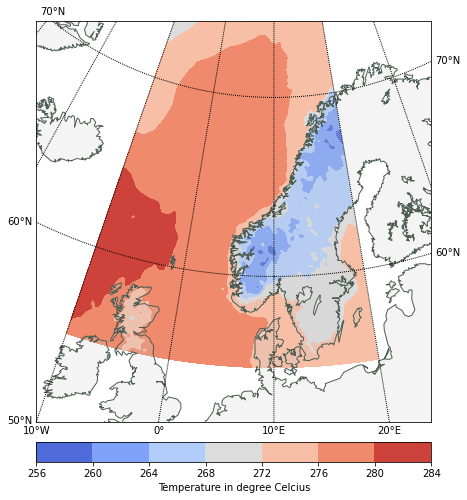

In [73]:
% matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

timestep=0; modellevel=59

temp_background = model_background.air_temperature[timestep,modellevel,:,:]
temp_analysis   = model_analysis.air_temperature[timestep,modellevel,:,:]

fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)
m = Basemap(projection='stere', 
            boundinglat=40, lon_0=10, lat_0=78.4, 
            resolution='l', 
            llcrnrlat= 50.0, urcrnrlat=72.0, llcrnrlon=-10.0, urcrnrlon=40.0)
 
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)

x, y = m(*np.meshgrid(model_background.lon,model_background.lat))

cs=m.contourf(x,y,temp_analysis,cmap=plt.cm.coolwarm,extemd='max')

cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius') 

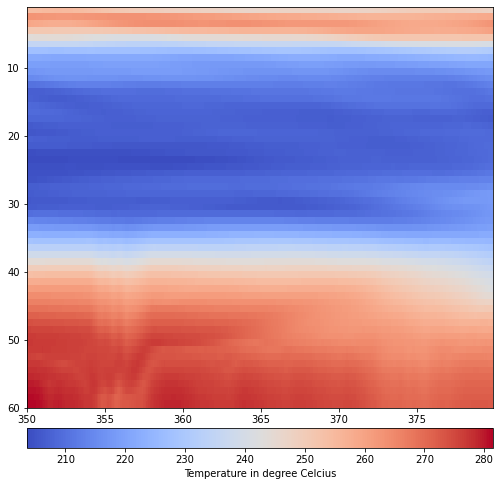

In [60]:
fig = plt.figure(figsize=(7.2,7.2)) #11.7
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)
ax = plt.subplot(111)


timestep=0; seclat=20; # Intersection at latitude model_analysis.lat[seclat]

tempvert_background =  np.array(model_background.air_temperature[timestep,:,seclat,:])
tempvert_analysis   =  np.array(model_analysis.air_temperature[timestep,:,seclat,:])

windvert_background=np.sqrt(np.array(model_background.x_wind[timestep,:,seclat,:]**2+model_background.y_wind[timestep,:,seclat,:]**2))
windvert_analysis  =np.sqrt(np.array(model_analysis.x_wind[timestep,:,seclat,:])**2+np.array(model_analysis.y_wind[timestep,:,seclat,:])**2)

humidvert_background =  np.array(model_background.specific_humidity[timestep,:,seclat,:])
humidvert_analysis   =  np.array(model_analysis.specific_humidity[timestep,:,seclat,:])

cs=ax.pcolor(model_background.lon, range(1,61),tempvert_background, cmap=plt.cm.coolwarm)

plt.gca().invert_yaxis()
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('Temperature in degree Celcius')   
#fig.colorbar(c, ax=ax1)